In [3]:
%pip install scikit-learn
%pip install seaborn

   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ------------ --------------------------- 3.4/11.1 MB 20.2 MB/s eta 0:00:01
   ----------------------------- ---------- 8.1/11.1 MB 21.0 MB/s eta 0:00:01
   ---------------------------------------- 11.1/11.1 MB 19.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/41.2 MB ? eta -:--:--
   ---- ----------------------------------- 5.0/41.2 MB 23.2 MB/s eta 0:00:02
   ---------- ----------------------------- 10.5/41.2 MB 24.2 MB/s eta 0:00:02
   ---------------- ----------------------- 16.5/41.2 MB 26.0 MB/s eta 0:00:01
   --------------------- ------------------ 21.8/41.2 MB 25.5 MB/s eta 0:00:01
   -------------------------- ------------- 27.5/41.2 MB 25.6 MB/s eta 0:00:01
   ------------------------------- -------- 32.2/41.2 MB 25.3 MB/s eta 0:00:01
   ---------------------------------- ----- 35.4/41.2 MB 23.9 MB/s eta 0:00:01
   ------------------------------------- -- 38.5/41.2 MB 22.7 MB/s eta 0:

In [4]:
# Daten & Vektoren
import pandas as pd
import numpy as np

# NLP
import spacy
from spacy.tokens import DocBin

# Clustering
from sklearn.cluster import KMeans

# Visualisierung (optional)
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
# Zeichenanzahl pro Spalte erhöhen
pd.set_option("display.max_colwidth", None)


In [6]:
# 1. spaCy-Modell laden
nlp = spacy.load("de_core_news_lg")

# 2. Doc-Objekte laden (du hast sie als .spacy gespeichert)
doc_bin = DocBin().from_disk("docs_de.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

# 3. DataFrame mit Metadaten laden
df = pd.read_excel("../../data/df_de_final_duplikate_markiert.xlsx")


In [7]:
# Alle Vektoren als numpy-Array
vectors = np.array([doc.vector for doc in docs])

print("Vektorform:", vectors.shape)


Vektorform: (7459, 300)


In [8]:
# Anzahl Cluster festlegen (z. B. 15 als Startwert)
n_clusters = 15
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Clustering durchführen
labels = kmeans.fit_predict(vectors)


In [17]:
# Neue Spalte im df
df["Cluster"] = labels

# Kontrolle: Cluster-Verteilung
df["Cluster"].value_counts().sort_index()


Cluster
0      81
1     690
2     568
3     974
4     666
5     241
6     252
7     177
8     468
9     598
10    331
11    654
12    623
13    615
14    521
Name: count, dtype: int64

In [24]:
# Beispiel: Zeige 5 Fragen aus Cluster 0
df[df["Cluster"] == 3][["Frage_Text"]].head()


,Frage_Text
13,Sollen sich die Versicherten stärker an den Gesundheitskosten beteiligen (z.B. Erhöhung der Mindestfranchise)?
18,Soll sich der Staat stärker für gleiche Bildungschancen einsetzen (z.B. mit Nachhilfe-Gutscheinen für Schüler/-innen aus Familien mit geringem Einkommen)?
40,"Soll der Bund das Service-Public-Angebot (z.B. ÖV-Verbindungen, Poststellen) in den ländlichen Regionen stärker fördern?"
52,Befürworten Sie strengere Tierschutzregelungen für die Haltung von Nutztieren (z.B. permanenter Zugang zum Aussenbereich)?
54,Soll die Einführung der elektronischen Stimmabgabe bei Wahlen und Abstimmungen (E-Voting) weiter vorangetrieben werden?


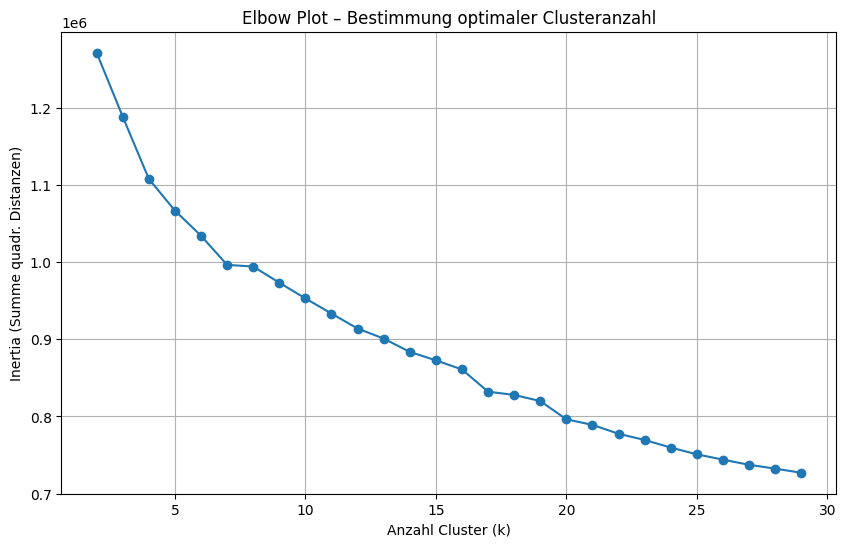

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Wähle Bereich der Cluster-Anzahl aus
cluster_range = range(2, 30)
inertias = []

# WICHTIG: vectors muss vorher erstellt sein → np.array([doc.vector for doc in docs])

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(vectors)
    inertias.append(kmeans.inertia_)  # inertia = Summe der quadr. Abstände zum Clusterzentrum

# Plot
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertias, marker='o')
plt.title("Elbow Plot – Bestimmung optimaler Clusteranzahl")
plt.xlabel("Anzahl Cluster (k)")
plt.ylabel("Inertia (Summe quadr. Distanzen)")
plt.grid(True)
plt.show()


In [26]:
from collections import Counter


def top_wörter_pro_cluster(df, cluster_id, n=10):
    # Nur Fragen aus dem gewünschten Cluster
    fragen = df[df["Cluster"] == cluster_id]["Frage_Text"]
    
    # Wörter sammeln (nur sinnvolle Tokens)
    wörter = []
    for frage in fragen:
        doc = nlp(frage)
        for token in doc:
            if not token.is_stop and not token.is_punct and token.is_alpha and len(token.text) > 2:
                wörter.append(token.lemma_.lower())
    
    # Häufigste Wörter anzeigen
    counter = Counter(wörter)
    print(f"🔹 Cluster {cluster_id} – häufigste Wörter:")
    for wort, anzahl in counter.most_common(n):
        print(f"  {wort} ({anzahl}×)")


In [27]:
# Beispiel: Cluster 0 analysieren
top_wörter_pro_cluster(df, cluster_id=0, n=15)

# Wenn du willst, kannst du mehrere durchgehen
for i in range(df["Cluster"].nunique()):
    print("\n" + "-"*40)
    top_wörter_pro_cluster(df, i)


🔹 Cluster 0 – häufigste Wörter:
  stadt (27×)
  befürworte (16×)
  lenzburg (16×)
  stark (16×)
  finanziell (14×)
  fördern (11×)
  via (9×)
  bepart (9×)
  massnahme (7×)
  kanton (7×)
  frage (6×)
  ausbauen (5×)
  einführen (5×)
  einführung (5×)
  gebühr (5×)

----------------------------------------
🔹 Cluster 0 – häufigste Wörter:
  stadt (27×)
  befürworte (16×)
  lenzburg (16×)
  stark (16×)
  finanziell (14×)
  fördern (11×)
  via (9×)
  bepart (9×)
  massnahme (7×)
  kanton (7×)

----------------------------------------
🔹 Cluster 1 – häufigste Wörter:
  kanton (298×)
  stark (176×)
  befürworte (98×)
  finanziell (90×)
  schweiz (75×)
  polizei (75×)
  präsenz (73×)
  öffentlich (69×)
  vertrag (67×)
  sichtbar (66×)

----------------------------------------
🔹 Cluster 2 – häufigste Wörter:
  befürworte (409×)
  erhöhung (165×)
  rentenalter (128×)
  einführung (109×)
  chf (103×)
  frau (96×)
  mann (96×)
  mindestlohn (78×)
  liberalisierung (77×)
  vollständig (76×)

------

In [29]:
# 1. spaCy-Modell laden
nlp = spacy.load("de_core_news_lg")

# 2. Doc-Objekte laden (du hast sie als .spacy gespeichert)
doc_bin = DocBin().from_disk("docs_de.spacy")
docs = list(doc_bin.get_docs(nlp.vocab))

# 3. DataFrame mit Metadaten neu laden um ein sauberes df zu haben
df = pd.read_excel("../../data/df_de_final_duplikate_markiert.xlsx")


In [30]:
# Alle Vektoren als numpy-Array
vectors = np.array([doc.vector for doc in docs])

print("Vektorform:", vectors.shape)


Vektorform: (7459, 300)


In [31]:
# KMeans-Clustering mit 7 Clustern
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
labels_kmeans = kmeans.fit_predict(vectors)

# Cluster-Labels ins DataFrame schreiben
df["KMeans_Cluster"] = labels_kmeans


In [32]:
from collections import Counter

# Dictionary zur Speicherung der Top-Wörter je Cluster
kmeans_topwörter = {}

for cluster_id in range(7):
    fragen = df[df["KMeans_Cluster"] == cluster_id]["Frage_Text"]
    wörter = []

    for frage in fragen:
        doc = nlp(frage)
        for token in doc:
            if not token.is_stop and not token.is_punct and token.is_alpha:
                wörter.append(token.lemma_.lower())

    counter = Counter(wörter)
    häufigste = counter.most_common(10)
    kmeans_topwörter[cluster_id] = ", ".join([f"{w}: {c}" for w, c in häufigste])

# Neue Spalte mit den Top-Wörtern zuweisen
df["KMeans_Top_Wörter"] = df["KMeans_Cluster"].apply(
    lambda cid: kmeans_topwörter.get(cid, "Unbekannt")
)


In [33]:
df.head()

,ID_Wahl,Datum,Frage_ID,Frage_Text,Frage_Typ,Bereich_ID,Bereich,ID_gesamt,Sprache,Duplikat,Frage_Hash,Duplikat_Gruppe,KMeans_Cluster,KMeans_Top_Wörter
0,2.0,2019-10-20 00:00:00,5.0,"Wie beurteilen Sie diese Aussage: ""Wer sich nichts zuschulden kommen lässt, hat von staatlichen Sicherheitsmassnahmen nichts zu befürchten.""",options7,4734.0,Werthaltungen,Q00000,de,True,f2aae15124ee3545b9c89fae390f5248,f2aae15124ee3545b9c89fae390f5248,5,"beurteilen: 546, aussage: 546, folgend: 301, stark: 154, notwendig: 94, frei: 85, marktwirtschaft: 85, profitieren: 85, langfristig: 85, bestrafung: 83"
1,2.0,2019-10-20 00:00:00,8.0,"Wie beurteilen Sie diese Aussage: ""Die Bestrafung Krimineller ist wichtiger als deren Wiedereingliederung in die Gesellschaft.""",options7,4734.0,Werthaltungen,Q00001,de,True,8a94c3975fc8c159c14b90d45a60b8d0,8a94c3975fc8c159c14b90d45a60b8d0,5,"beurteilen: 546, aussage: 546, folgend: 301, stark: 154, notwendig: 94, frei: 85, marktwirtschaft: 85, profitieren: 85, langfristig: 85, bestrafung: 83"
2,2.0,2019-10-20 00:00:00,11.0,"Wie beurteilen Sie diese Aussage: ""Für ein Kind ist es am besten, wenn ein Elternteil Vollzeit für die Kinderbetreuung zu Hause bleibt.""",options7,4734.0,Werthaltungen,Q00002,de,True,7e014c9f94d4b3936f1d048fe9510cd2,7e014c9f94d4b3936f1d048fe9510cd2,5,"beurteilen: 546, aussage: 546, folgend: 301, stark: 154, notwendig: 94, frei: 85, marktwirtschaft: 85, profitieren: 85, langfristig: 85, bestrafung: 83"
3,2.0,2019-10-20 00:00:00,14.0,Soll der Bund Ausländer/-innen bei der Integration stärker unterstützen?,options4,4231.0,Migration & Integration,Q00003,de,True,80b912b3dc74458a0602712be9bd0625,80b912b3dc74458a0602712be9bd0625,1,"kanton: 463, schweiz: 269, stark: 265, befürworte: 256, eu: 249, finanziell: 177, einführen: 150, befürworten: 145, stadt: 139, einführung: 131"
4,2.0,2019-10-20 00:00:00,17.0,Soll der Konsum von Cannabis legalisiert werden?,options4,4352.0,Gesellschaft & Ethik,Q00004,de,True,47056b453a87b839bb928dd32520d281,47056b453a87b839bb928dd32520d281,1,"kanton: 463, schweiz: 269, stark: 265, befürworte: 256, eu: 249, finanziell: 177, einführen: 150, befürworten: 145, stadt: 139, einführung: 131"


In [34]:
# Export mit allen Infos als Excel-Datei
df.to_excel("../../data/df_de_final_duplikate_markiert_kmeans.xlsx", index=False, engine="openpyxl")
